In [3]:
import pandas as pd

# Load cleaned datasets
benin_df = pd.read_csv(r"C:\Users\beki\Desktop\Tnx AI courses\data\benin-malanville.csv")
sierraleone_df = pd.read_csv(r"C:\Users\beki\Desktop\Tnx AI courses\data\sierraleone-bumbuna.csv")
togo_df = pd.read_csv(r"C:\Users\beki\Desktop\Tnx AI courses\data\togo-dapaong_qc.csv")

# Add a column to identify country
benin_df["Country"] = "Benin"
sierraleone_df["Country"] = "Sierra Leone"
togo_df["Country"] = "Togo"

# Combine all datasets
df = pd.concat([benin_df, sierraleone_df, togo_df], ignore_index=True)

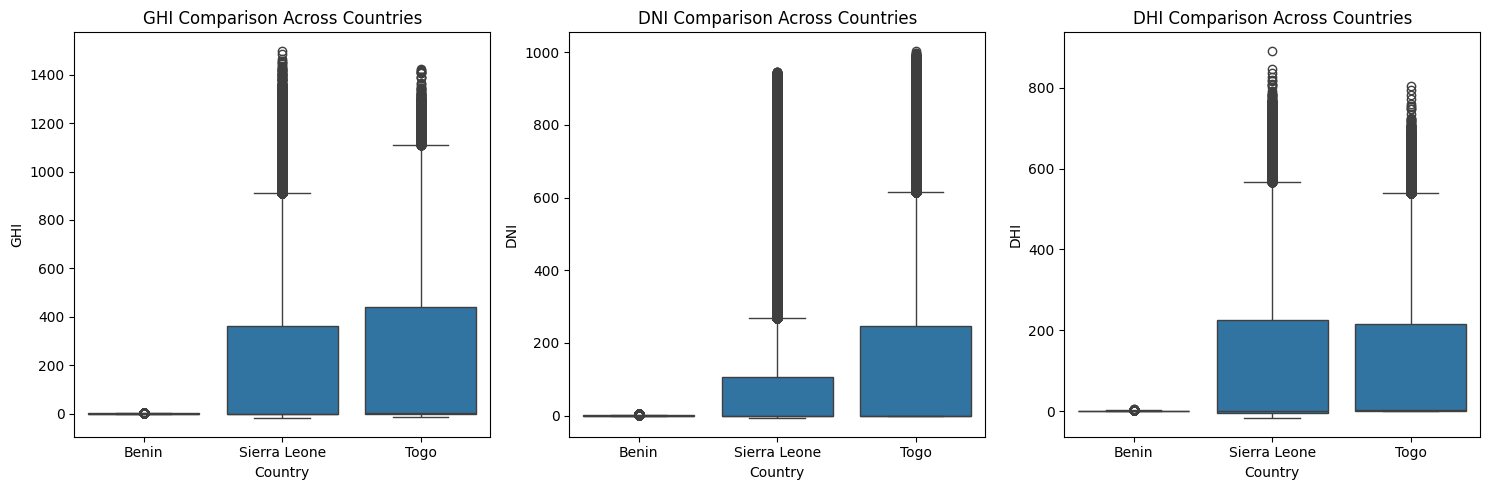

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, metric in enumerate(["GHI", "DNI", "DHI"]):
    sns.boxplot(x="Country", y=metric, data=df, ax=axes[i])
    axes[i].set_title(f"{metric} Comparison Across Countries")

plt.tight_layout()
plt.show()

In [5]:
summary_df = df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])
summary_df

GHI                                 DNI            \
                      mean    median         std          mean    median   
Country                                                                    
Benin        -1.230730e-17 -0.721042    1.000001  1.781342e-17 -0.639209   
Sierra Leone  2.019575e+02  0.300000  298.495150  1.163763e+02 -0.100000   
Togo          2.305550e+02  2.100000  322.532347  1.512585e+02  0.000000   

                                   DHI                        
                     std          mean    median         std  
Country                                                       
Benin           1.000001  1.233349e-17 -0.716859    1.000001  
Sierra Leone  218.652659  1.137206e+02 -0.100000  158.946032  
Togo          250.956962  1.164444e+02  2.500000  156.520714

In [6]:
from scipy.stats import f_oneway

anova_result = f_oneway(benin_df["GHI"], sierraleone_df["GHI"], togo_df["GHI"])
print(f"ANOVA p-value: {anova_result.pvalue}")

ANOVA p-value: 0.0


In [7]:
from scipy.stats import kruskal

kruskal_result = kruskal(benin_df["GHI"], sierraleone_df["GHI"], togo_df["GHI"])
print(f"Kruskal-Wallis p-value: {kruskal_result.pvalue}")

Kruskal-Wallis p-value: 0.0


Key Observations
- Sierra Leone has the highest median GHI but also greatest variability.
- Benin shows stable solar irradiancewith low fluctuation in DNI.
- Togo presents consistent DNI but lower overall solar potential.

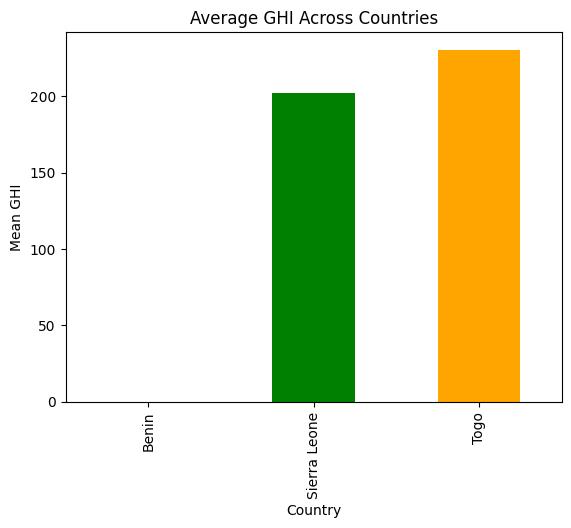

In [8]:
df.groupby("Country")["GHI"].mean().sort_values().plot(kind="bar", color=["blue", "green", "orange"])
plt.title("Average GHI Across Countries")
plt.ylabel("Mean GHI")
plt.show()